### Plotting Persistent Diagram and Barcode of a Point Cloud

In [1]:
import numpy as np
import matplotlib.pyplot as plt

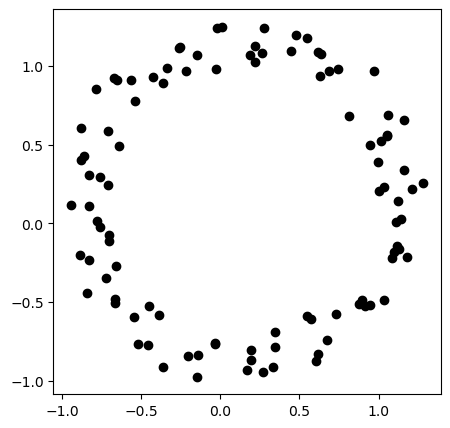

In [3]:
def make_circle(n_samples, radius:float=1, noise:float=0, random_seed:int=42):
  """
  Function to create a circle in 2D space
  :param: n_samples:   number of datapoints of sample
  :param: radius:      desired radius of circle
  :param: noise:       magnitude of noise sampled from uniform distribution
  :param: random_seed: set seed for "randomness"
  :return: circle of dimension (n_samples, 2)
  """
  np.random.seed(random_seed)
  theta = np.linspace(0, 2*np.pi, n_samples)
  X = radius * np.cos(theta) + (noise * np.random.uniform(0,1,n_samples))
  Y = radius * np.sin(theta) + (noise * np.random.uniform(0,1,n_samples))
  return np.transpose([X,Y])

# instantiate a circle
circle_data = make_circle(n_samples=100, radius=1, noise=0.3)  # try changing the parameters

# plotting data
plt.figure(figsize=(5,5))
plt.scatter(circle_data[:,0], circle_data[:,1], color='k')
# sns.despine()
plt.show()

def make_sphere(radius:float=1, noise:float=0, random_seed:int=42):
  """
  :param: radius:       desired radius of sphere
  :param: noise:        magnitude of noise sampled from uniform distribution
  :param: random_seed:  set seed for "randomness"
  :return: sphere of dimension (400, 3)
  """
  np.random.seed(random_seed)
  rho = radius
  theta, phi = np.mgrid[0:2*np.pi:20j, 0:np.pi:20j]
  x = rho * np.sin(phi) * np.cos(theta) + (noise * np.random.normal(0,1,size=(20,20)))
  y = rho * np.sin(phi) * np.sin(theta) + (noise * np.random.normal(0,1,size=(20,20)))
  z = rho * np.cos(phi) + (noise * np.random.normal(0,1,size=(20,20)))
  return np.array([x.flatten(), y.flatten(), z.flatten()]).transpose()

# instantiating the sphere
sphere_data = make_sphere(radius=5, noise=0.00)

# plotting data
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.scatter3D(sphere_data[:,0], sphere_data[:,1], sphere_data[:,2], alpha=0.5)
# ax.scatter3D(0,0,0, color='r', label='center')
# plt.legend()
# plt.show()

In [24]:
import copy
import matplotlib.patches as mpatches
        
def min_birth_max_death(diagram:list) -> tuple:
    """
    :param: diagram: persistence diagram
    :return: (min_birth, max_death)
    """
    maxdim = len(diagram)
    min_birth, max_death = 0, 0
    for i in range(maxdim):
        diag = np.array(diagram[i])
        new = np.max(diag[diag!=np.inf])
        if max_death < new:
            max_death = new
    return min_birth, max_death

def plot_persistence_barcode(diag:list, maxdim:int, ax=None, title='', colormap=plt.cm.Set1.colors, alpha:float=0., delta:float=0.1):
    min_birth, max_death = min_birth_max_death(diag[:maxdim+1])    
    new_diagram = copy.deepcopy(diag[:maxdim+1])
    new_diagram[0][-1,1] = max_death
    new_diagram = [sorted(new_diagram[i], key=lambda feature: (feature[0], feature[1]-feature[0])) for i in range(len(new_diagram))]

    # birth and death values (and color)
    x, y, c, dims = [], [], [], []
    for dim in range(len(new_diagram)):
        x.extend([birth for [birth, death] in new_diagram[dim]])
        y.extend([death-birth for [birth, death] in new_diagram[dim]])
        c.extend([colormap[dim] for [birth, death] in new_diagram[dim]])
        dims.extend([dim for [birth, death] in new_diagram[dim]])
    dimensions = {dim for dim in dims}
    # x = list(joinit(x, 0))
    # y = list(joinit(y, 0))
    # c = list(joinit(c, colormap[0]))
    # dims = list(joinit(dims, 0))

    # plotting
    ax = ax or plt.gca()
    ax.set_yticks([])
    ax.invert_yaxis()
    ax.set_xlim([min_birth-delta, max_death+delta])
    ax.set_xlabel('$\epsilon$')
    ax.set_title(title)
    ax.barh(range(len(x)), width=y, left=x, height=3, alpha=alpha, color=c, linewidth=0)
    ax.legend(handles=[mpatches.Patch(color=colormap[dim], label=str(dim)) for dim in dimensions], loc='best')

    return x, y, c

#### Complete Diagram

In [4]:
import ripser
from persim import plot_diagrams


circle_data = make_circle(n_samples=100, radius=1, noise=0.1)
dgm = ripser.ripser(circle_data, maxdim=1, thresh=np.inf)['dgms']

sphere_data = make_sphere(radius=3, noise=0)
dgm2 = ripser.ripser(sphere_data, maxdim=2, thresh=np.inf)['dgms']

In [14]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'b

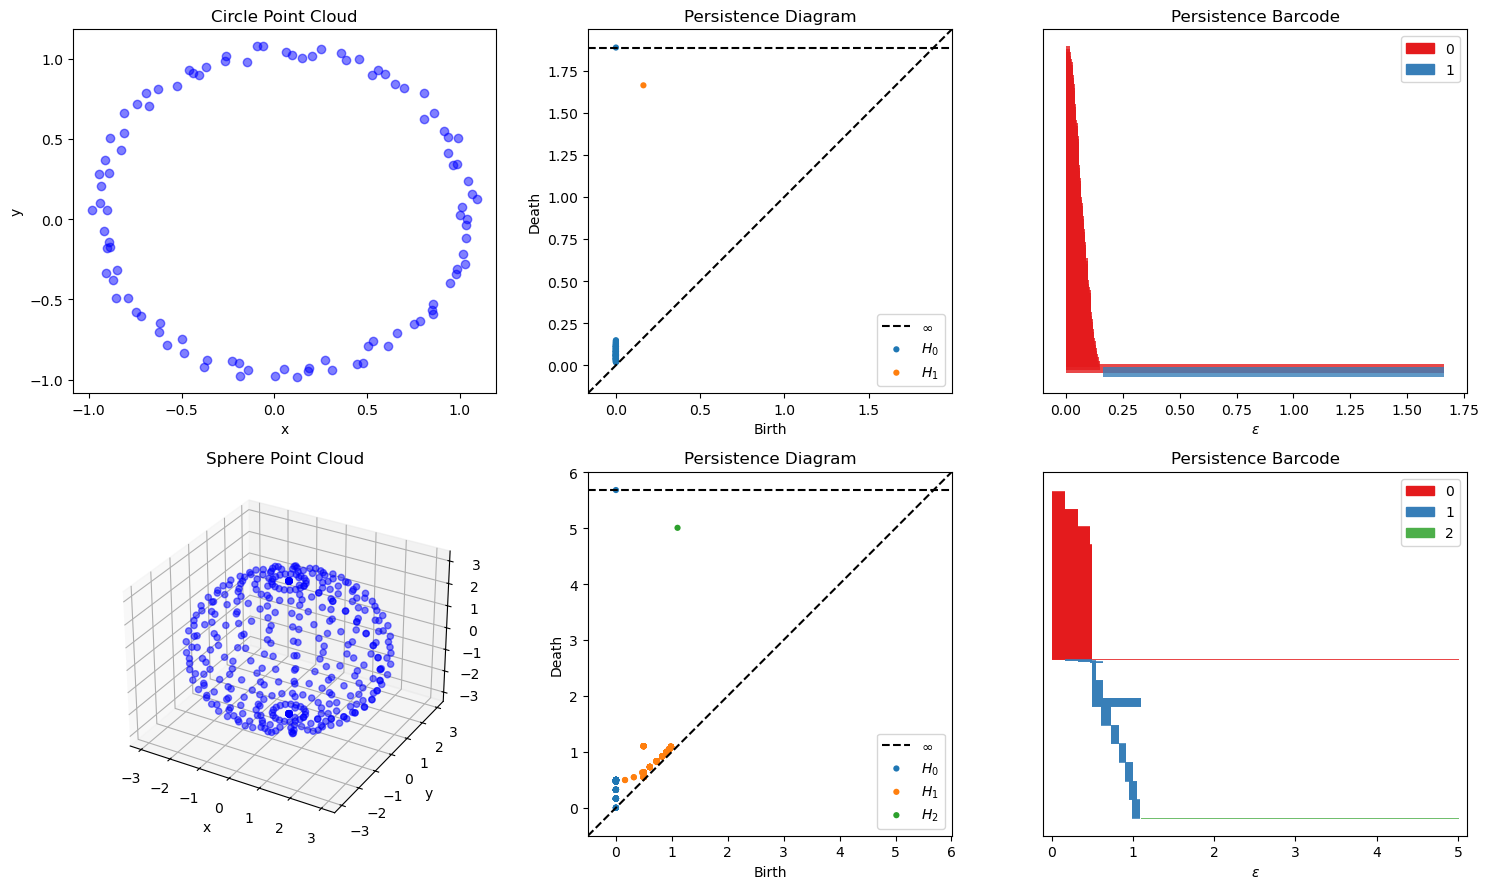

In [25]:
import matplotlib.pyplot as plt

# params = {'axes.labelsize': 20,
#           'axes.titlesize': 30}
# plt.rcParams.update(params)

fig = plt.figure(figsize=(15,9))

ax1 = fig.add_subplot(2,3,1)
ax1.scatter(circle_data[:,0], circle_data[:,1], color='b', alpha=0.5)
ax1.set_title('Circle Point Cloud')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2 = fig.add_subplot(2,3,2)
plot_diagrams(dgm, title='Persistence Diagram', ax=ax2)

ax3 = fig.add_subplot(2,3,3)
plot_persistence_barcode(dgm, maxdim=1, alpha=0.8, delta=0.1, title='Persistence Barcode', ax=ax3)

ax4 = fig.add_subplot(2,3,4, projection='3d')
ax4.scatter(sphere_data[:,0], sphere_data[:,1], sphere_data[:,2], color='b', alpha=0.5)
ax4.set_title('Sphere Point Cloud')
ax4.set_xlabel('x')
ax4.set_ylabel('y')

ax5 = fig.add_subplot(2,3,5)
plot_diagrams(dgm2, title='Persistence Diagram', ax=ax5)

ax6 = fig.add_subplot(2,3,6)
plot_persistence_barcode(dgm2, maxdim=2, alpha=0.8, delta=0.1, title='Persistence Barcode', ax=ax6)

plt.tight_layout()
plt.show()

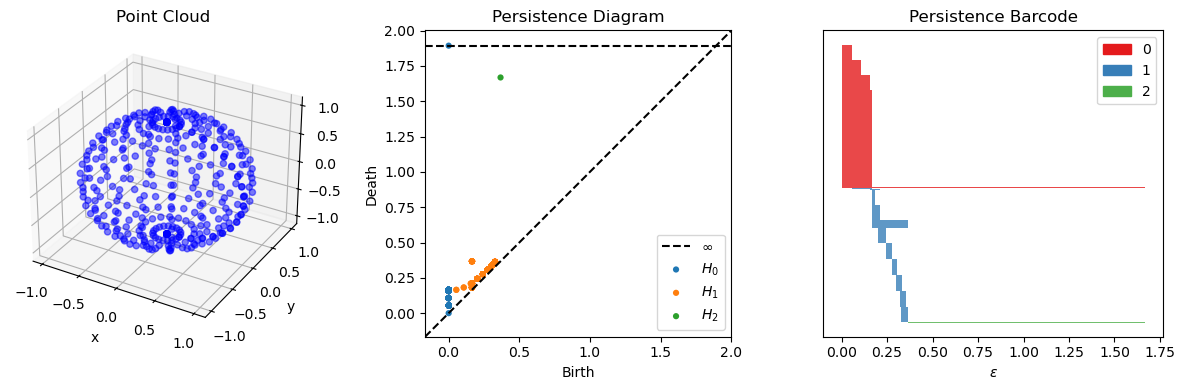